# Perceptron

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
plt.rcParams['figure.figsize'] = 10, 10

# Что такое нейронная сеть

**Нейронная сеть** — это последовательность нейронов, соединенных между собой синапсами. Структура нейронной сети пришла в мир программирования прямиком из биологии. Благодаря такой структуре, машина обретает способность анализировать и даже запоминать различную информацию. Нейронные сети также способны не только анализировать входящую информацию, но и воспроизводить ее из своей памяти.  
![Нейрон](http://aboutyourself.ru/assets/sinaps.jpg)
**Аксон** — длинный отросток нейрона. Приспособлен для проведения возбуждения и информации от тела нейрона к нейрону или от нейрона к исполнительному органу.  
**Дендриты** — короткие и сильно разветвлённые отростки нейрона, служащие главным местом для образования влияющих на нейрон возбуждающих и тормозных синапсов (разные нейроны имеют различное соотношение длины аксона и дендритов), и которые передают возбуждение к телу нейрона. 


### Синапс нейронной сети
<img src="images/LessonsII/synaps.png" alt="Synaps" height=20% width=20%>

## Перцептрон

<img src="images/LessonsII/perceptron.png" alt="vector scalar multiplication" width=50% height=50% >

$A$ - входящий вектор признаков  
$W$ - веса модели  
$b = w_0$ - сдвиг модели   
$y$ - результат модели  
$\sigma$ - функция активации

**<center>Смещение</center>**
$$
A_0 = 1
$$
$$
S = \sum_{i=0}^nA_iw_i
$$

X = [x1, x2, x3]; 
W = [w1, w2, w3]; 
$ b = w_0 $
$$
\vec x * \vec W = w_0 + x_1w_1 + x_2w_2 + x_3w_3
$$

**Набор данных MNIST**

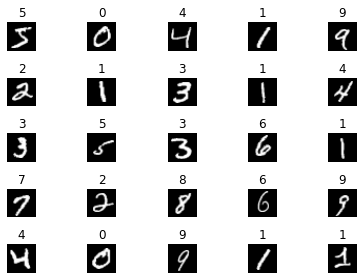

In [2]:
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize((0.5), (0.5))
                                            ])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=False)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False)


# Printing 25 random images from the training dataset
random_samples = np.random.randint(1, len(train_dataset), (25))

for idx in range(random_samples.shape[0]):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')


plt.tight_layout()
plt.show()

Образцы рукописных цифр из набора данных MNIST, 

In [6]:
test1 = train_dataset[0]
# (Img, label)
test1

In [1]:
from IPython.display import Video

Video("data/MNIST.mp4")

**Превратим данные в вектора**

In [3]:
def encode_label(j):
    # 5 -> [[0], [0], [0], [0], [0], [1], [0], [0], [0], [0]]
    e = np.zeros((10,1))
    e[j] = 1.0
    return e

def shape_data(data):
    features = [np.reshape(x[0][0].numpy(), (784,1)) for x in data]
    labels = [encode_label(y[1]) for y in data]
    return zip(features, labels)

In [8]:
test2 = [test1]
reshape = shape_data(test2)
list(reshape)

In [9]:
train = shape_data(train_dataset)
test = shape_data(test_dataset)

In [10]:
train = list(train)
test = list(test)
print('train imgs -', len(train))
print('test imgs -', len(test))

train imgs - 60000
test imgs - 10000


In [ ]:
# Итого:
#   Изображения превращены в векторы размера 784, лэйблы - 10
#   Осталось подобрать такой вектор весов W, чтобы скалярное умножение цифры 8 с ним
#   давало большое значение.

<img src="images/LessonsII/vec_multiplication.jpg" alt="vector scalar multiplication" width=40% height=40% >

Где V - это вектор изображения, W - веса нейросети


**Веса перцептрона**

In [1]:
# Что нужно для распознавания 8ки?
# 1) Параллельные (коллинеарные) векторы. 
# Чтобы умножение давало максимальное значение
# 2) Получить образ числа
# среднее представление 8ки (также как человек имеет среднее представление у себя в голове)

In [11]:
def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)

In [12]:
avg_eight = average_digit(train, 8)

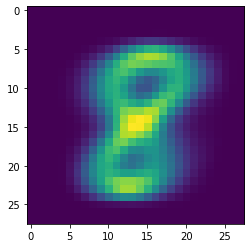

In [13]:
img = (np.reshape(avg_eight, (28, 28)))
plt.imshow(img)
plt.show()

Это  среднее  представление  цифры  8 (avg_eight) из обучающего  набора  MNIST 
содержит большое количество информации о том, какими общими свойствами 
должны  обладать  изображения  восьмерки.  Мы  используем  avg_eight  в  качестве 
параметров простой модели, чтобы определить, является ли данный входной вектор x, представляющий цифру, изображением восьмерки. Когда речь идет о нейронных сетях, под параметрами, как правило, подразумеваются веса, и в данном 
случае avg_eight будет выступать именно в качестве веса.

In [14]:
# train[ indx ][ img/label ]
x_2 = train[2][0] # 4-ка
x_17 = train[17][0] # 8-ка
W = np.transpose(avg_eight)

In [15]:
train[17][1]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

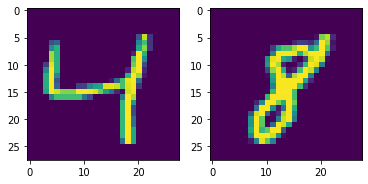

In [16]:
img_2 = (np.reshape(x_2, (28, 28)))
img_17 = (np.reshape(x_17, (28, 28)))

plt.subplot(1, 2, 1)
plt.imshow(img_2)
plt.subplot(1, 2, 2)
plt.imshow(img_17)
plt.show()

Вычислим скалярное произведение W и x, т. е. попарно перемножим 
значения W и x и суммируем все 784 результирующих значения. Если наша гипотеза верна и x соответствует 8, то более темные пиксели должны располагаться примерно в тех же местах, что и в случае W, и наоборот. Если же х не соответствует 8, то 
совпадений должно быть меньше. Давайте проверим эту гипотезу на нескольких 
примерах.

In [28]:
res_4by8 = np.dot(W, x_2)[0][0] / np.linalg.norm(W)
res_4by8 

2.7090142

In [29]:
res_8by8 = np.dot(W, x_17)[0][0] / np.linalg.norm(W)
res_8by8

7.351549

### Функция активации перцептрона

**Ступенчатая функция (binary step function)**

\begin{equation}
    \begin{matrix}
    {F(x)} & =
    & \left\{
    \begin{matrix}
    1 &  \mbox{if } x \geq 0  \\
    0 &  \mbox{if } x < 0 & 
    \end{matrix} \right.
    \end{matrix}
\end{equation}

<img src="images/LessonsII/binary_step_function.png" alt="Binary" height=40% width=40%>

In [25]:
def binary_step(x):
    return 1.0 if x>=0 else 0

In [30]:
res = binary_step(res_4by8)
print(f"Это 8-ка - {bool(res)}")

Это 8-ка - True


In [31]:
res = binary_step(res_8by8)
print(f"Это 8-ка - {bool(res)}")

Это 8-ка - True


Добавим "смещение"

In [34]:
b = -45

In [32]:
def predict(x, W, b):
    return binary_step((np.dot(W,x) + b)/ np.linalg.norm(W))

In [35]:
res = predict(x_2, W, b)
print(f"Это 8-ка - {bool(res)}")

Это 8-ка - False


In [36]:
res = predict(x_17, W, b)
print(f"Это 8-ка - {bool(res)}")

Это 8-ка - True


Верность предсказаний "восьмерок" нашей простой моделью составляет 78% (0,7814) - на обучающих данных и 77% (0,7749) на тестовых

**FC**

<img src="images/LessonsII/mnist_fc.png" alt="FC" height=40% width=40%>

In [2]:
Video("data/FC.mp4")

https://adamharley.com/nn_vis/mlp/2d.html

Минусы
- Большое количество параметров
- Отсутствие трансляционной инвариантности

# Нейрон как разделяющая гиперплоскость

Что мы на самом деле сделали, когда нашли коллинеарный вектор W = avg_eight и смещение b?

<img src="images/LessonsII/avg_digit.png" alt="avgarage digit.png" height=30% width=30%>

Прямая линия на плоскости задаётся уравнением 
$ x_1w_1 + x_2w_2 + b = 0 $ или $  \vec x^T * \vec w + b = 0$

Где первые два коэффициента $w_1, w_2$ задают всё семейство прямых линий, проходящих через точку (0, 0). Соотношение между $w_1$ и $w_2$ определяет угол наклона прямой к осям.

А вектор $(w_1, w_2)$ — это нормаль к прямой $w_1 x_1 + w_2 x_2 + b = 0$:

Таким образом наш вектор $\vec W $ = avg_eight является нормалью к прямой $x_1w_1 + x_2w_2 + b = 0 $

<img src="images/LessonsII/normal_line.png" alt="avgarage digit" height=30% width=30%>


Все точки **x**, лежащие на этой прямой, при скалярном умножении на **w** дают 0. Если точка **x** лежит "над прямой", то > 0, если "под прямой" - меньше.

Другими словами:


$w^T x + b > 0$ — точка лежит «выше» гиперплоскости

$w^T x + b < 0$ — точка лежит «ниже» гиперплоскости

<img src="images/LessonsII/dist.png" alt="dist" height=15% width=15%>


Расстояние от произвольной точки $x$ до гиперплоскости равно $ \vec d = \vec w * (\vec x - \vec x_0)$, где $x_0 $ - точка, принадлежащая гиперплоскости ($w^Tx_0 + b = 0$)

<img src="images/LessonsII/hyperplane.png" alt="hyperplane" height=30% width=30%>

$ \vec d = \vec w * (\vec x - \vec x_0) = -\vec w * \vec x_0 + \vec w *\vec x = \vec b + \vec w *\vec x$


$b = - \vec w * \vec x_0 $

$d(x) = { w^T x + b \over ||w||} $

Вернёмся к нейрону. Несложно видеть, что он вычисляет расстояние d от точки с координатами x=(x1,...,xn) (вектор входов) до гиперплоскости (b, ω). Параметры нейрона ω=(w1,...,wn) определяют направление нормали гиперплоскости, а b связан со смещением плоскости вдоль вектора ω. 

<img src="images/LessonsII/hyper_neuron.png" alt="hyper_neuron" height=30% width=30%>

Если два класса в пространстве признаков разделяются гиперплоскостью, то для их распознавания достаточно одного нейрона. 

Слой состоящий из 3-х нейронов выглядит следующим образом: Каждый выходной нейрон отделяет "свой класс" от остальных двух.

<img src="images/LessonsII/hyper_neurons.png" alt="hyper_neurons" height=30% width=30%>

In [3]:
# http://synset.com/ai/ru/nn/NeuralNet_01_Intro.html

# Задание
0. Нельзя пользоваться фреймворками глубокого обучения - Pytorch, TensorFlow, Keras и т.д.
1. Рассчитать average_digit (матрицу весов) для каждой цифры от 0 до 9, по аналогии с (avg_eight). 
2. Создать десять классификаторов с весами "avg_digit". На вход классификатора подаётся цифра из тестового набора, а на выходе мы получаем 0 или 1, в зависимости от того принадлежит ли цифра нужному классу ('0' - '9'). Добавить смещение (bias).
2. Рассчитать точность каждого классификатора.
3. Объеденить получившиеся классификаторы в одну модель, которая принимает картинку, а выдаёт вектор размера 10. (напр. input=[3], output = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).
4. Рассчитать 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 и 𝑟𝑒𝑐𝑎𝑙𝑙 получившейся модели на тестовом наборе.
5. Визуализировать набор необработанных данных с помощью алгоритма t-SNE. Взять 30 изображений каждого класса, каждое изображение перевести в вектор размера (784), визуализировать полученные вектора с помощью t-SNE.
6. Визуализировать результаты работы вашей модели (логиты) с помощью алгоритма t-SNE. Прогнать изображения через вашу модель, получившиеся вектора размера (10) визуализировать с помощью t-SNE.

$precision = {TP \over TP + FP} $
$recall = {TP \over TP + FN}$

## Что должно получиться (примерно):

MNIST_images
<img src="images/LessonsII/mnist_training_data_tSNE.png" alt="Regression" height=30% width=30%>
MNIST_embeddings
<img src="images/LessonsII/mnist_embeddings_tSNE.png" alt="Regression" height=30% width=30%>